In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib
import pickle

In [2]:
train = pd.read_csv('Train_maskedv2.csv')
test = pd.read_csv('Test_maskedv2.csv')
submissions = pd.read_csv('samplesubmissionv2.csv')
vd = pd.read_csv('variable_descriptions_v2.csv')

In [3]:
print(train.shape)
print(test.shape)

(3174, 50)
(1102, 49)


In [4]:
#train1 = pd.read_csv('Train_maskedv2.csv')
Labels = np.array(train['target_pct_vunerable'])
print(Labels)

[1.73980135 1.99338128 0.03834043 ... 0.95882823 1.02493356 5.28312496]


In [5]:
train = train.drop(['ward'], axis = 1)
test = test.drop(['ward'], axis = 1)

In [6]:
train = train.drop(['target_pct_vunerable'], axis = 1)

In [15]:
Features = np.array(train)
test_enc = np.array(test)

In [16]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(Features[:, :2])
Features[:, :2] = scaler.transform(Features[:, :2])
print(Features[:, :2])

[[ 2.39332973  2.24143765]
 [ 2.39589974  1.95576558]
 [ 0.03500428 -0.34738967]
 ...
 [ 1.28187264  1.7725368 ]
 [ 2.34357064  2.42775473]
 [ 0.69408404  0.63945612]]


In [17]:
scaler1 = preprocessing.StandardScaler().fit(test_enc[:, :2])
test_enc[:, :2] = scaler1.transform(test_enc[:, :2])
print(test_enc[:, :2])

[[ 0.13419093 -0.21968301]
 [-0.35426187 -0.33662952]
 [-0.44754093 -0.75222655]
 ...
 [ 0.77852795  0.58555251]
 [-0.16056497  0.19254307]
 [-0.28253971 -0.65862822]]


In [18]:
import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.5)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400, max_depth=10, max_features='auto',
                            min_samples_leaf=1, min_samples_split=2, random_state=0)
rf.fit(x_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
rf_pred = rf.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(rf_pred, y_test) ** 0.5

6.49310756631509

In [21]:
preds = rf.predict(test_enc)
#preds = xg_reg.predict(test_enc)
submissions.target_pct_vunerable = preds
submissions.to_csv('SouthAfricaCovid3.csv', index=False)

In [ ]:
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 2000, seed = 123, max_depth = 10,
                           learning_rate=0.01, booster = 'dart', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)

eval_set = [(x_test, y_test)]
xg_reg.fit(x_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True, early_stopping_rounds = 200)

[0]	validation_0-rmse:15.96861
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:15.84116
[2]	validation_0-rmse:15.71721
[3]	validation_0-rmse:15.59156
[4]	validation_0-rmse:15.47181
[5]	validation_0-rmse:15.34913
[6]	validation_0-rmse:15.22616
[7]	validation_0-rmse:15.10789
[8]	validation_0-rmse:14.98900
[9]	validation_0-rmse:14.86812
[10]	validation_0-rmse:14.74769
[11]	validation_0-rmse:14.63137
[12]	validation_0-rmse:14.51790
[13]	validation_0-rmse:14.40194
[14]	validation_0-rmse:14.29399
[15]	validation_0-rmse:14.18140
[16]	validation_0-rmse:14.07108
[17]	validation_0-rmse:13.96337
[18]	validation_0-rmse:13.85308
[19]	validation_0-rmse:13.74749
[20]	validation_0-rmse:13.63845
[21]	validation_0-rmse:13.53544
[22]	validation_0-rmse:13.43523
[23]	validation_0-rmse:13.33747
[24]	validation_0-rmse:13.23754
[25]	validation_0-rmse:13.14221
[26]	validation_0-rmse:13.04956
[27]	validation_0-rmse:12.94859
[28]	validation_0-rmse:12.85619
[29]	validation_

[256]	validation_0-rmse:6.59137
[257]	validation_0-rmse:6.58837
[258]	validation_0-rmse:6.58596
[259]	validation_0-rmse:6.58386
[260]	validation_0-rmse:6.58128
[261]	validation_0-rmse:6.57904
[262]	validation_0-rmse:6.57683
[263]	validation_0-rmse:6.57496
[264]	validation_0-rmse:6.57247
[265]	validation_0-rmse:6.57061
[266]	validation_0-rmse:6.56876
[267]	validation_0-rmse:6.56651
[268]	validation_0-rmse:6.56450
[269]	validation_0-rmse:6.56218
[270]	validation_0-rmse:6.55977
[271]	validation_0-rmse:6.55774
[272]	validation_0-rmse:6.55566
[273]	validation_0-rmse:6.55319
[274]	validation_0-rmse:6.55134
[275]	validation_0-rmse:6.55001
[276]	validation_0-rmse:6.54866
[277]	validation_0-rmse:6.54653
[278]	validation_0-rmse:6.54460
[279]	validation_0-rmse:6.54221
[280]	validation_0-rmse:6.54056
[281]	validation_0-rmse:6.53928
[282]	validation_0-rmse:6.53791
[283]	validation_0-rmse:6.53693
[284]	validation_0-rmse:6.53484
[285]	validation_0-rmse:6.53330
[286]	validation_0-rmse:6.53190
[287]	va

In [95]:
rf_pred_test1 = rf.predict(test_enc)
xg_pred_test1 = xg_reg.predict(test_enc)
#rdg_pred_test1 = rdg.predict(test_enc)

In [96]:
stacked_predictions = np.column_stack((rf_pred_test, xg_pred_test))
stacked_test_predictions = np.column_stack((rf_pred_test1, xg_pred_test1))

In [97]:
meta_model = LinearRegression()

meta_model.fit(stacked_predictions, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
final_pred = meta_model.predict(stacked_test_predictions)

In [99]:
test_enc.shape

(1102, 42)

In [27]:
c.shape

(1102, 3)

In [30]:
b_array = np.array(b)
c_array = np.array(c)

In [31]:
indx2 = range(b_array.shape[0])
indx2 = ms.train_test_split(indx2, test_size = 0.2)
x_train2 = b_array[indx2[0],:]
y_train2 = np.ravel(y_test[indx2[0]])
x_test2 = b_array[indx2[1],:]
y_test2 = np.ravel(y_test[indx2[1]])

In [33]:
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(508, 3)
(508,)
(127, 3)
(127,)


In [40]:
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 1400, seed = 123, max_depth = 10,
                           learning_rate=0.01, booster = 'dart', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)

eval_set = [(x_train2, y_train2), (x_test2, y_test2)]
xg_reg.fit(x_train2, y_train2, eval_metric="rmse", eval_set=eval_set, verbose=True, early_stopping_rounds = 200)

[0]	validation_0-rmse:15.67519	validation_1-rmse:16.55806
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:15.52598	validation_1-rmse:16.42884
[2]	validation_0-rmse:15.38489	validation_1-rmse:16.30147
[3]	validation_0-rmse:15.23962	validation_1-rmse:16.17809
[4]	validation_0-rmse:15.09366	validation_1-rmse:16.06168
[5]	validation_0-rmse:14.95348	validation_1-rmse:15.94061
[6]	validation_0-rmse:14.81525	validation_1-rmse:15.80944
[7]	validation_0-rmse:14.67522	validation_1-rmse:15.69457
[8]	validation_0-rmse:14.53703	validation_1-rmse:15.57080
[9]	validation_0-rmse:14.40209	validation_1-rmse:15.45718
[10]	validation_0-rmse:14.27523	validation_1-rmse:15.34295
[11]	validation_0-rmse:14.13993	validation_1-rmse:15.22572
[12]	validation_0-rmse:14.00854	validation_1-rmse:15.11858
[13]	validation_0-rmse:13.87546	validation_1-rmse:15.00464
[14]	validation_0-rmse:1

[139]	validation_0-rmse:4.49753	validation_1-rmse:8.35777
[140]	validation_0-rmse:4.46030	validation_1-rmse:8.33985
[141]	validation_0-rmse:4.42054	validation_1-rmse:8.32669
[142]	validation_0-rmse:4.38396	validation_1-rmse:8.30963
[143]	validation_0-rmse:4.34455	validation_1-rmse:8.29324
[144]	validation_0-rmse:4.30707	validation_1-rmse:8.27641
[145]	validation_0-rmse:4.27528	validation_1-rmse:8.25874
[146]	validation_0-rmse:4.23856	validation_1-rmse:8.24081
[147]	validation_0-rmse:4.20230	validation_1-rmse:8.22839
[148]	validation_0-rmse:4.16982	validation_1-rmse:8.21928
[149]	validation_0-rmse:4.13652	validation_1-rmse:8.20192
[150]	validation_0-rmse:4.10283	validation_1-rmse:8.18695
[151]	validation_0-rmse:4.06863	validation_1-rmse:8.17314
[152]	validation_0-rmse:4.03186	validation_1-rmse:8.15203
[153]	validation_0-rmse:3.99925	validation_1-rmse:8.13984
[154]	validation_0-rmse:3.96447	validation_1-rmse:8.12693
[155]	validation_0-rmse:3.93580	validation_1-rmse:8.11259
[156]	validati

[281]	validation_0-rmse:1.52078	validation_1-rmse:7.50274
[282]	validation_0-rmse:1.50989	validation_1-rmse:7.50269
[283]	validation_0-rmse:1.49914	validation_1-rmse:7.50231
[284]	validation_0-rmse:1.49002	validation_1-rmse:7.50051
[285]	validation_0-rmse:1.47889	validation_1-rmse:7.49762
[286]	validation_0-rmse:1.46850	validation_1-rmse:7.49653
[287]	validation_0-rmse:1.45890	validation_1-rmse:7.49658
[288]	validation_0-rmse:1.44817	validation_1-rmse:7.49751
[289]	validation_0-rmse:1.44011	validation_1-rmse:7.49678
[290]	validation_0-rmse:1.43126	validation_1-rmse:7.49664
[291]	validation_0-rmse:1.42116	validation_1-rmse:7.49573
[292]	validation_0-rmse:1.41153	validation_1-rmse:7.49660
[293]	validation_0-rmse:1.40274	validation_1-rmse:7.49668
[294]	validation_0-rmse:1.39292	validation_1-rmse:7.49657
[295]	validation_0-rmse:1.38400	validation_1-rmse:7.49562
[296]	validation_0-rmse:1.37576	validation_1-rmse:7.49500
[297]	validation_0-rmse:1.36554	validation_1-rmse:7.49512
[298]	validati

[423]	validation_0-rmse:0.69157	validation_1-rmse:7.51560
[424]	validation_0-rmse:0.68801	validation_1-rmse:7.51526
[425]	validation_0-rmse:0.68483	validation_1-rmse:7.51480
[426]	validation_0-rmse:0.68103	validation_1-rmse:7.51420
[427]	validation_0-rmse:0.67764	validation_1-rmse:7.51469
[428]	validation_0-rmse:0.67478	validation_1-rmse:7.51464
[429]	validation_0-rmse:0.67192	validation_1-rmse:7.51560
[430]	validation_0-rmse:0.66927	validation_1-rmse:7.51572
[431]	validation_0-rmse:0.66577	validation_1-rmse:7.51589
[432]	validation_0-rmse:0.66254	validation_1-rmse:7.51512
[433]	validation_0-rmse:0.65910	validation_1-rmse:7.51455
[434]	validation_0-rmse:0.65597	validation_1-rmse:7.51409
[435]	validation_0-rmse:0.65316	validation_1-rmse:7.51384
[436]	validation_0-rmse:0.64970	validation_1-rmse:7.51380
[437]	validation_0-rmse:0.64718	validation_1-rmse:7.51452
[438]	validation_0-rmse:0.64412	validation_1-rmse:7.51433
[439]	validation_0-rmse:0.64156	validation_1-rmse:7.51428
[440]	validati

XGBRegressor(base_score=0.7, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=1400, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=123, reg_alpha=0,
       reg_lambda=0.03, scale_pos_weight=1, seed=123, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

In [41]:
final_prediction = xg_reg.predict(c_array)

In [42]:
final_prediction.shape

(1102,)

In [100]:
#preds = xg_reg.predict(test_enc)
submissions.target_pct_vunerable = final_pred
submissions.to_csv('SouthAfricaCovid2.csv', index=False)

In [45]:
#from sklearn.ensemble import RandomForestRegressor
rf_final = RandomForestRegressor(n_estimators=400, max_depth=5, max_features='auto',
                            min_samples_leaf=1, min_samples_split=2, random_state=0)
rf_final.fit(b_array, x_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [46]:
final_prediction = rf_final.predict(c_array)

In [7]:
excluded_cols = ['dw_12', 'dw_13', 'lan_13', 'dw_10', 'psa_02', 'lan_07', 'lan_09']

for i in excluded_cols:
    test = test.drop(i, axis=1)
for j in excluded_cols:
    train = train.drop(j, axis=1)

In [8]:
train['avg_individuals'] = train['total_individuals'] / train['total_households']
test['avg_individuals'] = test['total_individuals'] / test['total_households']

In [67]:
rf_pred = rf.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(rf_pred, y_test) ** 0.5

6.743862986511016

In [10]:
for i in train.columns:
    train[i] = 1 + train[i]
    train[i] = np.log(train[i])

In [29]:
test.head()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,avg_individuals
0,7.830045,8.991943,0.513998,0.059282,0.096687,0.006867,0.021063,0.015495,0.035342,0.010935,...,0.000420,0.011419,0.061758,0.682729,0.009877,0.003218,0.002693,0.004870,0.419372,1.434339
1,7.512464,8.922107,0.433636,0.329915,0.038858,0.000000,0.000000,0.000000,0.002629,0.005061,...,0.000000,0.000160,0.000000,0.692616,0.000296,0.000301,0.000305,0.000160,0.526925,1.628492
2,7.451816,8.673929,0.677054,0.003519,0.001430,0.000000,0.000000,0.000000,0.018376,0.004757,...,0.000631,0.006483,0.000171,0.670848,0.012097,0.000000,0.029570,0.001921,0.659567,1.480636
3,9.424566,10.863080,0.334523,0.004723,0.001067,0.000278,0.000799,0.180453,0.005213,0.063432,...,0.000593,0.008295,0.000000,0.257451,0.527553,0.003232,0.000628,0.007696,0.653091,1.651480
4,7.470371,8.358801,0.596194,0.016559,0.075637,0.008935,0.046771,0.015281,0.007238,0.000000,...,0.000234,0.016705,0.164325,0.105135,0.052700,0.006043,0.600755,0.005455,0.691259,1.233180


In [11]:
train.head()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,avg_individuals
0,9.515689,10.571959,0.303658,0.004770,0.157430,0.007830,0.006773,0.022820,0.014636,0.043453,...,0.001721,0.027416,0.026376,0.421776,0.040624,0.332572,0.028617,0.010240,0.469540,1.354742
1,9.517449,10.400649,0.232809,0.002063,0.074801,0.000597,0.000976,0.003752,0.095203,0.207837,...,0.041125,0.021089,0.015631,0.690092,0.001827,0.000853,0.000586,0.002828,0.530120,1.229269
2,7.900748,9.019508,0.547023,0.002289,0.050373,0.008175,0.001443,0.005076,0.057733,0.124718,...,0.014678,0.005811,0.048204,0.688138,0.003576,0.002543,0.003196,0.000663,0.679208,1.401631
3,7.584248,9.112813,0.478223,0.129384,0.004987,0.002700,0.000000,0.002784,0.007353,0.112594,...,0.003082,0.003131,0.013470,0.656837,0.004454,0.009806,0.053257,0.002296,0.551199,1.725155
4,7.524603,9.201284,0.586376,0.114069,0.058907,0.001154,0.001042,0.000508,0.002169,0.006739,...,0.000117,0.001470,0.000000,0.690179,0.000476,0.004025,0.000704,0.000714,0.498934,1.848474


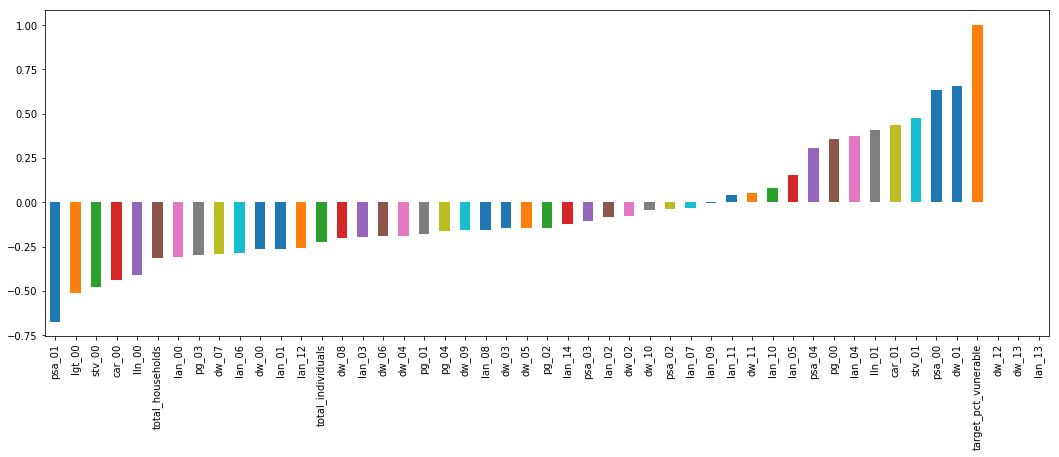

In [26]:
# Look at correlation with target
train.corr()['target_pct_vunerable'].sort_values().plot(kind='bar', figsize=(18, 6))

In [12]:
excluded_cols = ['dw_12', 'dw_13', 'lan_13', 'dw_10', 'psa_02', 'lan_07', 'lan_09']

for i in excluded_cols:
    test = test.drop(i, axis=1)
for j in excluded_cols:
    train = train.drop(j, axis=1)

KeyError: "['dw_12'] not found in axis"

In [13]:
train['avg_individuals'] = train['total_individuals'] / train['total_households']
test['avg_individuals'] = test['total_individuals'] / test['total_households']

In [14]:
test.shape

(1102, 42)

In [32]:
Labels

array([1.73980135, 1.99338128, 0.03834043, ..., 0.95882823, 1.02493356,
       5.28312496])